#### Cosi 135b Computational Semantics Final Project
# Word2Vec with Friends
#### Zachary Boroda, Sam Brenner, and Ben Bar Zvi

First some important imports

In [13]:
import numpy as np
import pickle
import pandas as pd
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

Text(0.5, 0, 'Iteration')

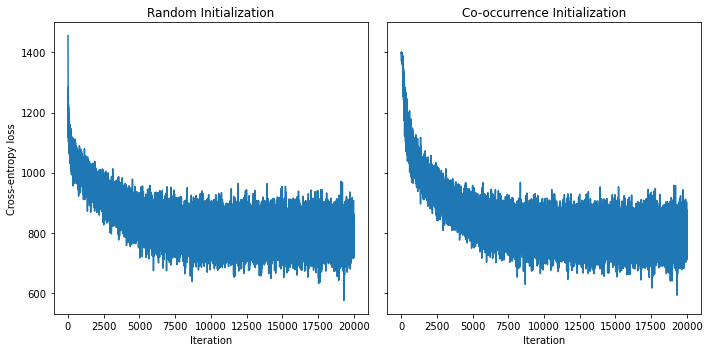

In [14]:
fitness_traj_co_oc = np.load("trainingoutput_seed0/fitness_trajectory_training_cooccurrence_book7.npy")
fitness_traj_random = np.load("trainingoutput_seed0/fitness_trajectory_training_random_book7.npy")

fig, ax = plt.subplots(1,2, sharey=True, tight_layout=True, figsize=(10, 5))
ax[0].plot(fitness_traj_random)
ax[0].set_title("Random Initialization")
ax[0].set_ylabel("Cross-entropy loss")
ax[0].set_xlabel("Iteration")
ax[1].plot(fitness_traj_co_oc)
ax[1].set_title("Co-occurrence Initialization")
ax[1].set_xlabel("Iteration")


Now let us load in and complete our word vectors

In [15]:
context_matrix_co_oc = np.load("trainingoutput_seed0/context_matrix_training_cooccurrence_book7.npy")
embeddings_matrix_co_oc = np.load("trainingoutput_seed0/embeddings_matrix_training_cooccurrence_book7.npy")

context_matrix_random = np.load("trainingoutput_seed0/context_matrix_training_random_book7.npy")
embeddings_matrix_random = np.load("trainingoutput_seed0/embeddings_matrix_training_random_book7.npy")

final_embeddings_co_oc = embeddings_matrix_co_oc.T #+ context_matrix_co_oc
final_embeddings_random = embeddings_matrix_random.T #+ context_matrix_random

with open('trainingoutput_seed0/word_dict_book7.pickle', 'rb') as handle:
    word_to_embedding_dict = pickle.load(handle)

df_final_embeddings_co_oc = pd.DataFrame(final_embeddings_co_oc, columns=word_to_embedding_dict)
df_final_embeddings_random = pd.DataFrame(final_embeddings_random, columns=word_to_embedding_dict)
df_final_embeddings_random

,dark,lord,ascending,two,men,appeared,out,nowhere,few,yard,...,boats,bye,friday,incere,tactful,bravest,kisses,reminders,craned,bereavement
0,0.298377,0.139013,0.792940,-0.461914,-0.025841,1.401900,0.750507,1.908521,0.487991,0.746645,...,0.774234,0.629073,0.273700,0.947462,0.118415,0.435147,0.588309,0.816120,0.769271,0.535325
1,0.683437,-0.419782,-0.579074,-0.039458,1.952923,0.003214,1.215410,1.132407,0.500049,2.433390,...,0.232960,0.320658,0.129903,0.407149,0.463643,0.640448,0.999045,0.045138,0.881822,0.723208
2,0.067907,-0.743573,-0.961451,0.243016,-0.118444,0.156472,0.427091,0.972277,1.669715,0.551938,...,0.590153,0.885762,0.497298,0.102021,0.575875,0.879716,0.065281,0.197379,0.217610,0.370836
3,0.736340,1.895870,2.422980,0.929244,1.314720,1.814013,0.770892,1.484312,0.809041,1.893667,...,0.766803,0.468699,0.356077,0.747538,0.056634,0.614348,0.200042,0.650838,0.807406,0.988643
4,0.514934,-0.294191,1.461365,1.561989,2.012772,0.313437,0.234094,0.931445,-0.077507,-0.331026,...,0.180705,0.067214,0.310431,0.943242,0.725059,0.963895,0.916505,0.852219,0.616256,0.178018
5,1.350964,1.341625,-0.144956,-0.704117,-0.239228,-0.604127,-0.458922,-1.182750,0.462265,-0.772344,...,0.087824,0.077333,0.721089,0.212351,0.515632,0.107088,0.704442,0.721670,0.393811,0.913691
6,0.604613,0.321431,1.139478,-0.107522,0.659398,0.559569,0.247115,1.410457,-0.018097,1.032550,...,0.999332,0.885267,0.783804,0.793861,0.473502,0.041120,0.478387,0.489611,0.887645,0.309695
7,-1.253870,0.810934,-0.520234,-0.502726,-0.787228,0.275305,0.472557,-0.704675,-0.598884,-1.112930,...,0.719433,0.899823,0.990767,0.724792,0.287827,0.189283,0.739513,0.351713,0.238332,0.881693
8,-0.424256,-0.335204,-1.271081,0.205087,0.423495,-0.237680,0.027699,-0.100771,-0.374506,-0.038585,...,0.386833,0.512391,0.265493,0.272905,0.028263,0.022735,0.646649,0.033269,0.024305,0.476282
9,1.044176,1.248206,1.090700,-0.077770,1.128180,0.640682,0.637561,0.933406,-0.020500,0.862314,...,0.346943,0.398194,0.037597,0.132426,0.364170,0.174326,0.467289,0.253645,0.953200,0.021537


Now lets see how similar Harry and Voldemort are in the two different sets of embeddings

In [16]:
def cosign_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

print("Random initialized model")
print("\t", "Cosine similarity between Harry and Malfoy:", cosign_similarity(df_final_embeddings_random['harry'], df_final_embeddings_random['malfoy']))

print("\t", "Cosine similarity between Harry and Voldemort:", cosign_similarity(df_final_embeddings_random['harry'], df_final_embeddings_random['voldemort']))

print("Co-occurrence initialized model")
print("\t", "Cosine similarity between Harry and Malfoy:", cosign_similarity(df_final_embeddings_co_oc['harry'], df_final_embeddings_co_oc['malfoy']))

print("\t", "Cosine similarity between Harry and Voldemort:", cosign_similarity(df_final_embeddings_co_oc['harry'], df_final_embeddings_co_oc['voldemort']))

Random initialized model
	 Cosine similarity between Harry and Malfoy: 0.31138184552751996
	 Cosine similarity between Harry and Voldemort: 0.34133503741482013
Co-occurrence initialized model
	 Cosine similarity between Harry and Malfoy: 0.135009460485981
	 Cosine similarity between Harry and Voldemort: 0.41208771375072534


In [17]:
def scatter_labels(x, y, labels, title):
    fig, ax = plt.subplots(1,1)
    ax.scatter(x, y)
    for i, label in enumerate(labels):
        ax.annotate(label, (x[i], y[i]))
    ax.set_title(title)
    plt.show()


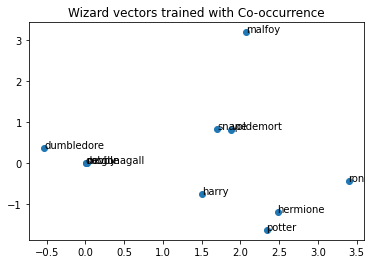

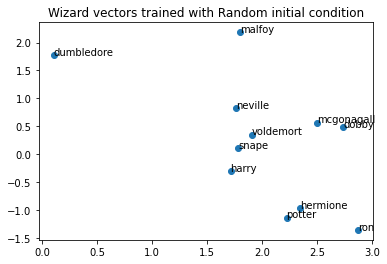

In [34]:
wizardslist = ["harry", "ron", "hermione", "neville", "voldemort", "malfoy", "snape", "dumbledore", "potter", "mcgonagall", "dobby"]

df_wizards_co_oc = df_final_embeddings_co_oc[wizardslist]
df_wizards_random = df_final_embeddings_random[wizardslist]
svd = TruncatedSVD(n_components=3)
dimensional_reduced = svd.fit_transform(df_wizards_co_oc.T)
scatter_labels(dimensional_reduced[:,0], dimensional_reduced[:,1], wizardslist, "Wizard vectors trained with Co-occurrence")

svd = TruncatedSVD(n_components=3)
dimensional_reduced = svd.fit_transform(df_wizards_random.T)
scatter_labels(dimensional_reduced[:,0], dimensional_reduced[:,1], wizardslist, "Wizard vectors trained with Random initial condition")

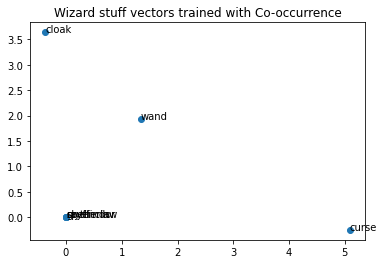

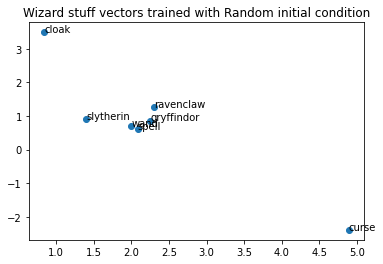

In [19]:
wizardstufflist = ["curse", "spell", "cloak", "wand", "ravenclaw", "slytherin", "gryffindor"]

df_wizardstuff_co_oc = df_final_embeddings_co_oc[wizardstufflist]
df_wizardstuff_random = df_final_embeddings_random[wizardstufflist]
svd = TruncatedSVD(n_components=2)
dimensional_reduced = svd.fit_transform(df_wizardstuff_co_oc.T)
scatter_labels(dimensional_reduced[:,0], dimensional_reduced[:,1], wizardstufflist, "Wizard stuff vectors trained with Co-occurrence")

svd = TruncatedSVD(n_components=2)
dimensional_reduced = svd.fit_transform(df_wizardstuff_random.T)
scatter_labels(dimensional_reduced[:,0], dimensional_reduced[:,1], wizardstufflist, "Wizard stuff vectors trained with Random initial condition")


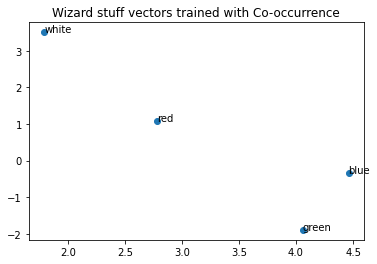

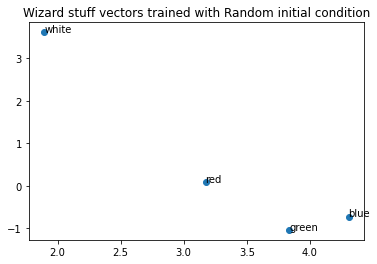

In [20]:
colors = ["green", "red", "blue", "white"]

df_colors_co_oc = df_final_embeddings_co_oc[colors]
df_colors_random = df_final_embeddings_random[colors]
svd = TruncatedSVD(n_components=2)
dimensional_reduced = svd.fit_transform(df_colors_co_oc.T)
scatter_labels(dimensional_reduced[:,0], dimensional_reduced[:,1], colors, "Wizard stuff vectors trained with Co-occurrence")

svd = TruncatedSVD(n_components=2)
dimensional_reduced = svd.fit_transform(df_colors_random.T)
scatter_labels(dimensional_reduced[:,0], dimensional_reduced[:,1], colors, "Wizard stuff vectors trained with Random initial condition")

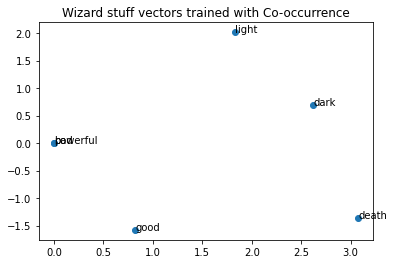

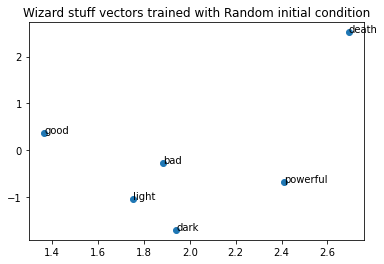

In [21]:
traitlist = ["good", "bad", "dark", "light", "death", "powerful"]

df_traitlist_co_oc = df_final_embeddings_co_oc[traitlist]
df_traitlist_random = df_final_embeddings_random[traitlist]
svd = TruncatedSVD(n_components=2)
dimensional_reduced = svd.fit_transform(df_traitlist_co_oc.T)
scatter_labels(dimensional_reduced[:,0], dimensional_reduced[:,1], traitlist, "Wizard stuff vectors trained with Co-occurrence")

svd = TruncatedSVD(n_components=2)
dimensional_reduced = svd.fit_transform(df_traitlist_random.T)
scatter_labels(dimensional_reduced[:,0], dimensional_reduced[:,1], traitlist, "Wizard stuff vectors trained with Random initial condition")

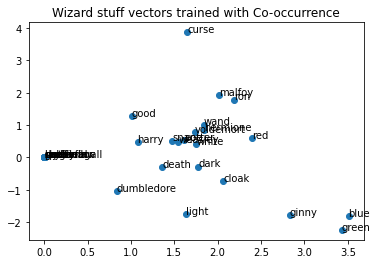

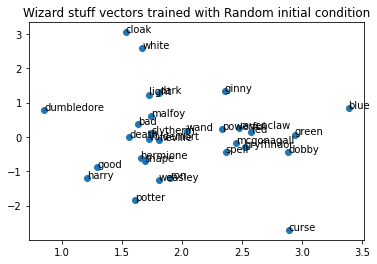

In [28]:
all_words = wizardslist + wizardstufflist + colors + traitlist

df_all_words_co_oc = df_final_embeddings_co_oc[all_words]
df_all_words_random = df_final_embeddings_random[all_words]
svd = TruncatedSVD(n_components=3)
dimensional_reduced = svd.fit_transform(df_all_words_co_oc.T)
scatter_labels(dimensional_reduced[:,0], dimensional_reduced[:,1], all_words, "Wizard stuff vectors trained with Co-occurrence")

svd = TruncatedSVD(n_components=3)
dimensional_reduced = svd.fit_transform(df_all_words_random.T)
scatter_labels(dimensional_reduced[:,0], dimensional_reduced[:,1], all_words, "Wizard stuff vectors trained with Random initial condition")